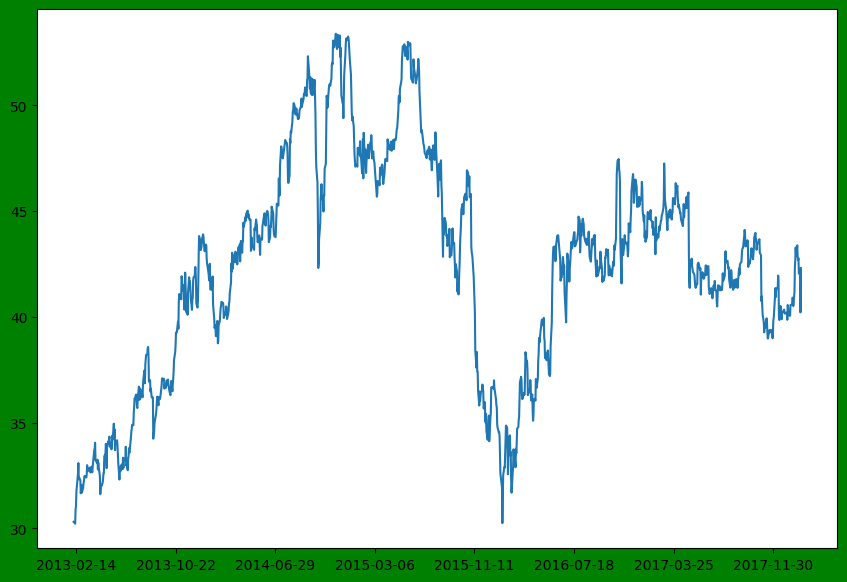

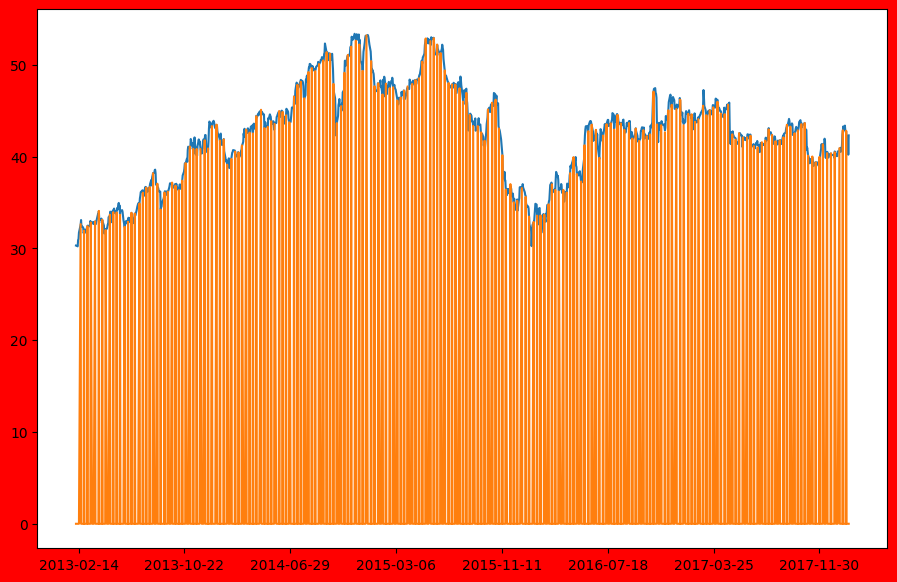

In [26]:
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import functools
import time
import numpy as np
import csv
import os









# helper function to display data
def byte_date_num(fmt , encoding = "utf-8"): # first we have whatever fmt as what we will input as well as the default utf format
    def byte_conv(b): # then we will create a nested function to convert the bytes under the encoding 
        s = b.decode(encoding) # creating variable s we then decodine the input under utf enconding
        return mdates.datestr2num(s) # using matlotlib we will use datestr2num then converting datestr to number
    return byte_conv # finally we will return the function call



def Open_graph():
    date , Open , high , low , close , volume = np.loadtxt(r"C:\Users\agboo\Downloads\Archer-Daniels-Midland-Volume.txt" , unpack = True , delimiter = ","
                                                           , converters = {0:byte_date_num("%Y-%m-%d")})
    # the order should go figure->subplot2grid->date,open,high,low,close,volume
    OP = plt.figure(figsize = (10,7), facecolor = "green")

    sub_open = plt.subplot2grid((50,50) , (0,0) , rowspan = 50 , colspan = 50) # # 50 X 50 grid , withe 50 spans apart on the grid' # this is the axis
    
    
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(True)
    sub_open.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    
    sub_open.plot(date,Open) # so we will plot the open data and then try to find key events there

    plt.grid = True
    plt.subplots_adjust(0.1)
    plt.show()

Open_graph()







# create a pattern within the range of data , we will use n = 30 , which in our case is 30 days worth of data 

# we will use percent change 

# this means that within our range of data , we will see how much the data has changed form "day to day"

#ex 1. looking at our file we have a open price of 30.31 on 02/08/2013
# -> the next day we have a open price of 30.26 on 02/11/2013
# we would calulate how much this value changed 


# using the percent change formula




#How will we find patterns


#percent_change =  ( (new - old) / old ) X 100    


#so in our example we have

#(30.26 - 30.31 / 30.31) X 100 = -0.164 % 

# we would then do this for a range of values , then finally taking the most prominent percent change and letting that be our outcome

# now we will load the txt file once more

date , Open , high , low , close , volume = np.loadtxt(r"C:\Users\agboo\Downloads\Archer-Daniels-Midland-Volume.txt" , unpack = True , delimiter = "," 
                                                        , converters = {0:byte_date_num("%Y-%m-%d")})





def percent_change(old,new):
    very_small = 1 * 10 ** -15
    price_change = new - old
    return (price_change / old + very_small) * 100
    # im putting the extra zeroes there to handle the edge case where the old value is really small to avoid dividing by zero
    # very_small should be small enough to where it should effect any of our predictions

# we will look out a months worth of data into the future and then perform percent change on all values list[i] , list[i+1]

# we would use this in live model with very short amounts of data
# so maybe instead I would use very small ticks , then usuing those very small ticks for finding outcomes

Prediction_Plot = []
Change_Store = []



def looker(Open_Prices , Changes , Store):
    for i in range(6): # we will look a month out
        Changes.append(round(percent_change(Open_Prices[i],Open_Prices[i + 1]),6))
    prediction = ((sum(Changes)/len(Changes) * Open_Prices[i]) + Open_Prices[i]) # this prediction will be for the 6th day
    return prediction
    
    
    

# change list type


def plotter(Open_Prices, Changes, P_Plot):
    x = 6
    j = 0
    for i in range(len(Open_Prices)):
        if i == x :
            for k in range(4): # so it starts at zero
                Changes.append(round(percent_change(Open_Prices[j], Open_Prices[j+1]),8))
                j += 1
            prediction = 0
            start = 1259
            for g in range(len(Changes))[::-1]:
                prediction += Changes[g]*(1/start)
                start += 1
            prediction = prediction * Open_Prices[x] + Open_Prices[x]# from re deriving percent change
            Changes = [] # this is to update week to week
            P_Plot.append(prediction)
            x += 6 # this will be the next prediction value
        else:
            P_Plot.append(0)
# this gives us around 180 week predictions

plotter(list(Open),Change_Store,Prediction_Plot)

# so now we will re plot the graph with our predictions
    
                        
            
def Open_Predict(Predictions):
    date , Open , high , low , close , volume = np.loadtxt(r"C:\Users\agboo\Downloads\Archer-Daniels-Midland-Volume.txt" , unpack = True , delimiter = ",",
                                                 converters = {0:byte_date_num("%Y-%m-%d")})
    Prediction = plt.figure(figsize = (10,7) , facecolor = "red")

    sub_prediction = plt.subplot2grid((50,50),(0,0) , rowspan = 50 , colspan = 50)

    plt.gca().get_yaxis().get_major_formatter().set_useOffset(True)
    sub_prediction.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    sub_prediction.plot(date,Open)

    # the orangle lines are the week predictions
    sub_prediction.plot(date,Predictions)

   



 
    plt.grid = True
    plt.subplots_adjust(0.05)
    plt.show()


Open_Predict(Prediction_Plot)

    





# averaging

# , we will have it where out first value is 1/1259 , using the length of the data we get really accurate predictions


    







    
    

                
        
                
            
    

























    